<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Trees/LinearRegression_LossFunction_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loss functions

The purpose of this Python notebook is to compute the loss and subsequently plot the loss function for the 1D linear regression model with a least squares loss.

You can save a local copy of this notebook in your Google account and work through it in Colab (recommended) or you can download the notebook and run it locally using Jupyter notebook or similar.  

Contact me at iclimbtreesmail@gmail.com if you find any mistakes or have any suggestions.

In [ ]:
# Math library
import numpy as np
# Plotting library
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [ ]:
# Create the same input / output data as used in the unit
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

In [ ]:
# Function to help plot the data
def plot(x, y, phi0=None, phi1=None):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    ax.set_aspect('equal')
    # Draw line if parameters passed
    x_line = np.arange(0,2,0.01)
    if(phi0 is not None and phi1 is not None):
        y_line = phi0 + phi1*x_line
        plt.plot(x_line, y_line,'r-',lw=2)
    plt.show()

# Define the model

The linear regression model is defined as:

$$\textrm{f}[x,\boldsymbol\phi] = \phi_0+\phi_1 x$$

where $\phi_0$ is the y-intercept and $\phi_1$ is the slope.

In [ ]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO -- define the linear regression model
  # REPLACE THIS CODE
  y = x

  # ANSWER
  y = phi0 + phi1 * x
  # END ANSWER

  return y

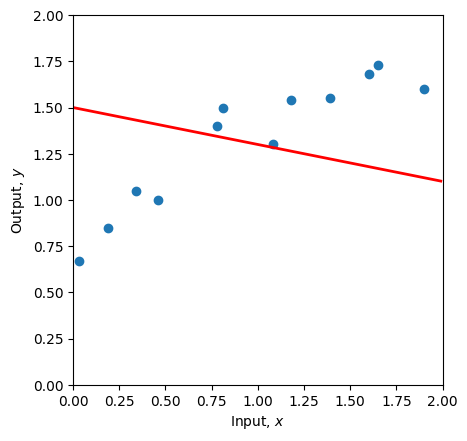

In [ ]:
plot(x,y, phi0 = 1.5, phi1=-0.2)

## Compute the least squares loss

The least squares loss is defined as the sum of the squared deviations of the model output $\textrm{f}[x_i,\boldsymbol\phi]$ and the true output target $y_i$:

 \begin{align} L[\boldsymbol\phi] & = \sum_{i=1}^{I} \bigl(\textrm{f}[x_{i}, \boldsymbol\phi]-y_{i}\bigr)^{2}  \\ &= \sum_{i=1}^{I} \bigl(\phi_{0}+\phi_{1}x_i-y_{i}\bigr)^{2} \tag{1.2}\end{align}

In [ ]:
# Function to calculate the loss
def compute_loss(x,y,f,phi0,phi1):

  # TODO Replace this line with the loss calculation (equation 2.5)
  loss = 0

  # ANSWER
  signed_distance = f(x,phi0,phi1)-y
  loss = np.sum(signed_distance * signed_distance)
  # END_ANSWER

  return loss

In [ ]:
# Let's check that this is correct
loss = compute_loss(x,y, phi0 = 0.4 , phi1 = 0.2)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


## Draw the loss function

In [ ]:
# Helper code to do the drawing
def draw_loss_function(compute_loss, x_in, y_in):
  # Define pretty colormap
  my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
  my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
  r = np.floor(my_colormap_vals_dec/(256*256))
  g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
  b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
  my_colormap = ListedColormap(np.vstack((r,g,b)).transpose()/255.0)

  # Make grid of intercept/slope values to plot
  intercepts_mesh, slopes_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.002))
  loss_mesh = np.zeros_like(slopes_mesh)

  # Compute loss for every set of parameters
  for idslope, slope in np.ndenumerate(slopes_mesh):
     loss_mesh[idslope] = compute_loss(x_in, y_in, intercepts_mesh[idslope], slope)

  fig,ax = plt.subplots()
  fig.set_size_inches(6,6)
  ax.contourf(intercepts_mesh,slopes_mesh,loss_mesh,256,cmap=my_colormap)
  ax.contour(intercepts_mesh,slopes_mesh,loss_mesh,40,colors=['#80808080'])

  ax.set_ylim([1,-1])
  ax.set_xlabel('Intercept, $\phi_0$')
  ax.set_ylabel('Slope, $\phi_1$')
  ax.set_aspect('equal')
  plt.show()

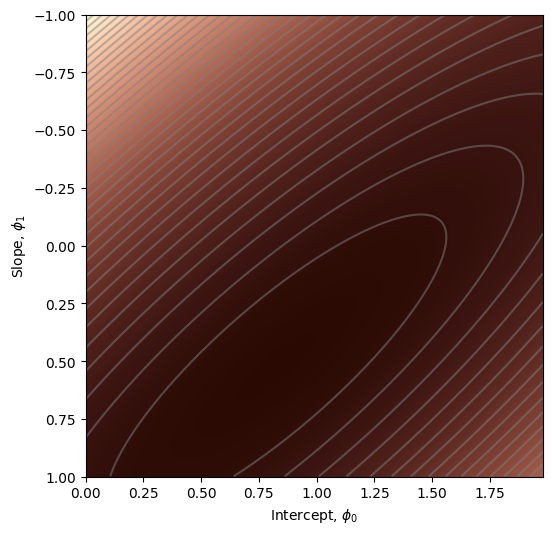

In [ ]:
draw_loss_function(compute_loss, x, y )

TODO -- experiment by changing the input x and y values (keeping them in the range $x\in[0,2], y\in[0,2]$)
Does the loss function always have a single minimum?
Think about why this might be.